# User Interfaces for TCLab

## Example: Manual Control

ToggleButton(value=False, button_style='danger', description='Stop')

FloatSlider(value=50.0, description='Heater 1')

FloatSlider(value=50.0, description='Heater 2')

TCLab version 0.4.9
Arduino Leonardo connected on port /dev/cu.usbmodem142101 at 115200 baud.
TCLab Firmware 1.5.1 Arduino Leonardo/Micro.


<IPython.core.display.Javascript object>


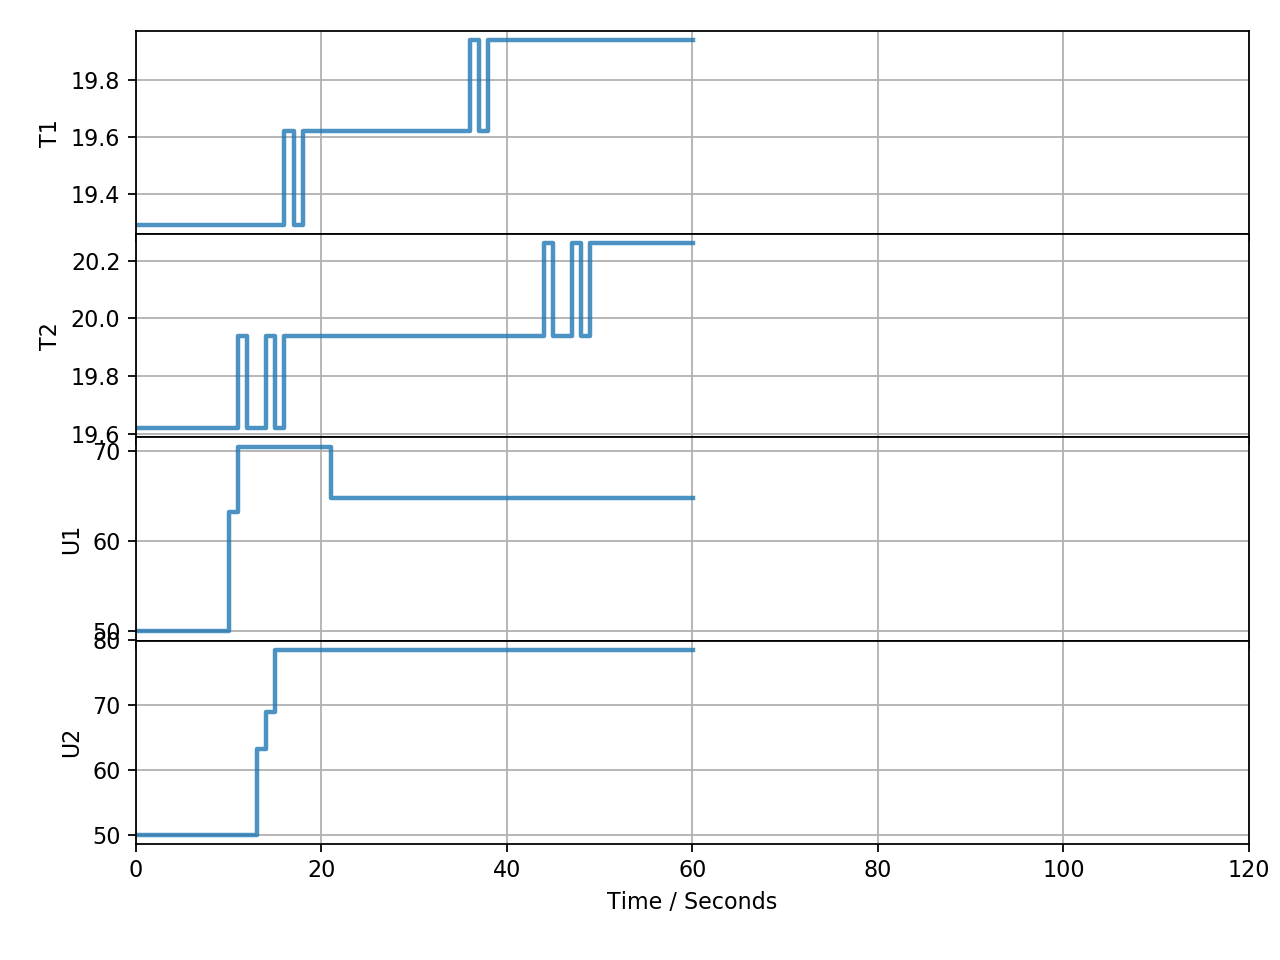

In [38]:
%matplotlib notebook

from tclab import TCLab, clock, Historian, Plotter

import threading
from IPython.display import display
import ipywidgets as widgets
import time

texperiment = 600

stop = widgets.ToggleButton(value=False, description="Stop", button_style="danger")
heater1 = widgets.FloatSlider(value=50, min=0, max=100, description="Heater 1")
heater2 = widgets.FloatSlider(value=50, min=0, max=100, description="Heater 2")

def work(stop, heater1, heater2):
    with TCLab() as lab:
        sources = [
            ('T1', lambda: lab.T1),
            ('T2', lambda: lab.T2),
            ('U1', lambda: lab.U1),
            ('U2', lambda: lab.U2)
        ]
        h = Historian(sources)
        p = Plotter(h)
        lab.P1 = 255
        lab.P2 = 255
        for t in clock(texperiment):
            lab.U1 = heater1.value
            lab.U2 = heater2.value
            p.update(t)
            if stop.value:
                break

thread = threading.Thread(target=work, args=(stop, heater1, heater2))
display(stop)
display(heater1)
display(heater2)
thread.start()

## Adding Widgets

Jupyter widgets can be used to create a UI for the Temperature Control Lab. The following code is modeled after [this example of a widget operating non-blocking code](https://github.com/jupyter-widgets/ipywidgets/issues/642).

ToggleButton(value=False, button_style='danger', description='Stop')

FloatSlider(value=30.0, description='Setpoint:', max=50.0, min=25.0, step=0.2)

IntSlider(value=200, description='Power', max=255)

TCLab version 0.4.9
Arduino Leonardo connected on port /dev/cu.usbmodem142101 at 115200 baud.
TCLab Firmware 1.5.1 Arduino Leonardo/Micro.


<IPython.core.display.Javascript object>


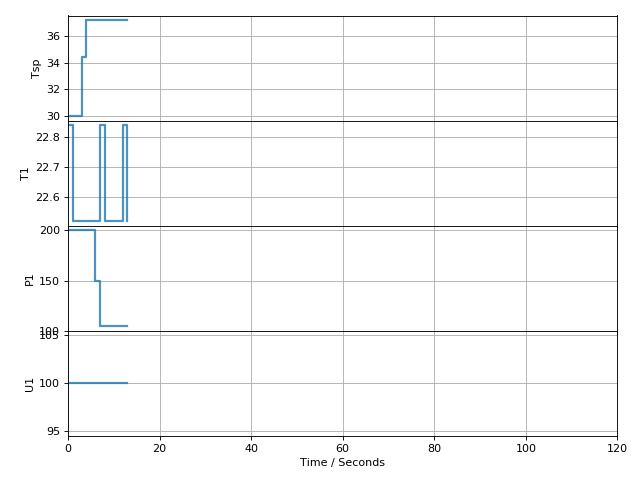

In [36]:
%matplotlib notebook

from tclab import TCLab, clock, Historian, Plotter

import threading
from IPython.display import display
import ipywidgets as widgets
import time

stop = widgets.ToggleButton(value=False, description="Stop", button_style="danger")
setpoint = widgets.FloatSlider(value=30, min=25, max=50, step=0.2, description="Setpoint:")
power = widgets.IntSlider(value=200, min=0, max=255, description="Power")

def work(stop, setpoint, power):
    with TCLab() as lab:
        sources = [
            ('Tsp', lambda: Tsp),
            ('T1', lambda: lab.T1),
            ('P1', lambda: lab.P1),
            ('U1', lambda: lab.U1)
        ]
        h = Historian(sources)
        p = Plotter(h)
        lab.P1 = 255
        for t in clock(120):
            Tsp = setpoint.value
            lab.P1 = power.value
            lab.U1 = 100 if lab.T1 < Tsp else 0
            p.update(t)
            if stop.value:
                break

thread = threading.Thread(target=work, args=(stop, setpoint, power))
display(stop)
display(setpoint)
display(power)
thread.start()